<a href="https://www.kaggle.com/code/albertobircoci/logistic-regression?scriptVersionId=253972004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
print(df['education'].value_counts(dropna=False))

education
1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [6]:
df['education'] = df['education'].fillna(0)
df['education'] = df['education'].astype(int)

education_map = {
    0: 'Unknown',
    1: 'Elementary',
    2: 'High School',
    3: 'Some College',
    4: 'College Graduate'
}
print(df['education'].value_counts())

education
1    1720
2    1253
3     687
4     473
0     105
Name: count, dtype: int64


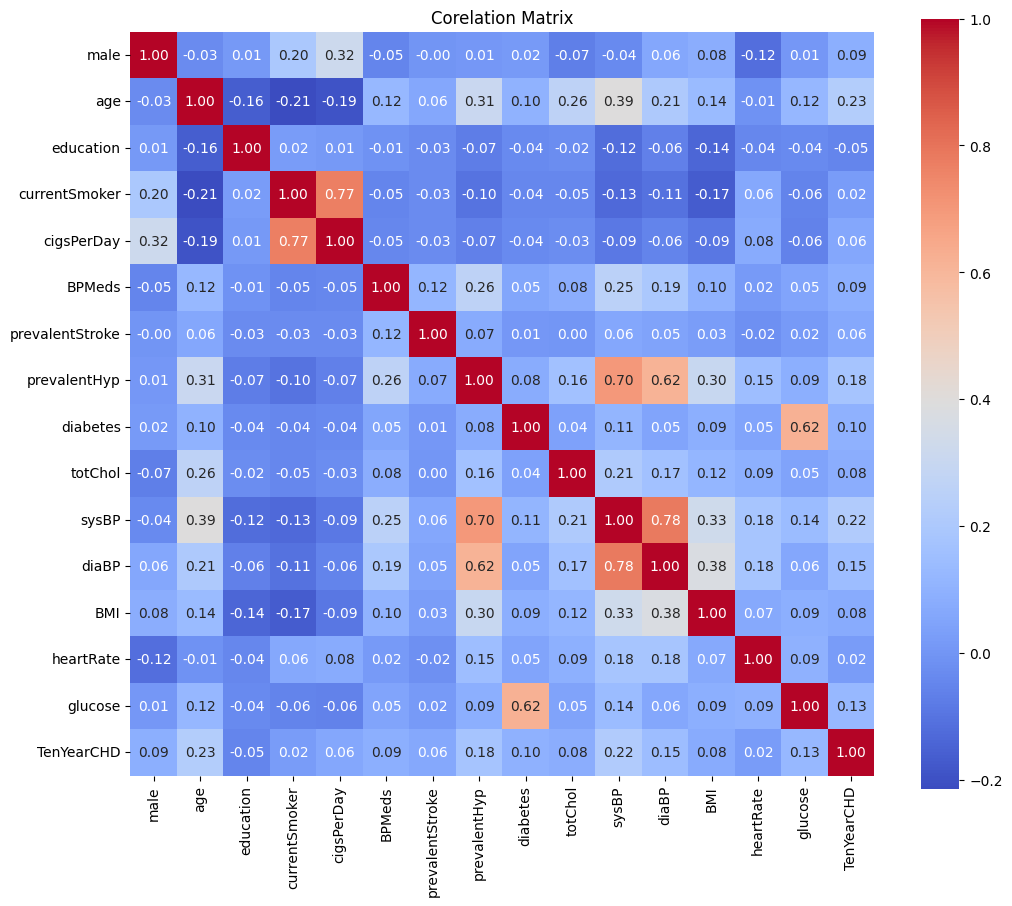

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Corelation Matrix")
plt.show()


In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3749 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   education        3749 non-null   int64  
 3   currentSmoker    3749 non-null   int64  
 4   cigsPerDay       3749 non-null   float64
 5   BPMeds           3749 non-null   float64
 6   prevalentStroke  3749 non-null   int64  
 7   prevalentHyp     3749 non-null   int64  
 8   diabetes         3749 non-null   int64  
 9   totChol          3749 non-null   float64
 10  sysBP            3749 non-null   float64
 11  diaBP            3749 non-null   float64
 12  BMI              3749 non-null   float64
 13  heartRate        3749 non-null   float64
 14  glucose          3749 non-null   float64
 15  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 497.9 KB


In [9]:
print(df['TenYearCHD'].value_counts())
print(df['TenYearCHD'].value_counts(normalize=True) * 100)


TenYearCHD
0    3177
1     572
Name: count, dtype: int64
TenYearCHD
0    84.742598
1    15.257402
Name: proportion, dtype: float64


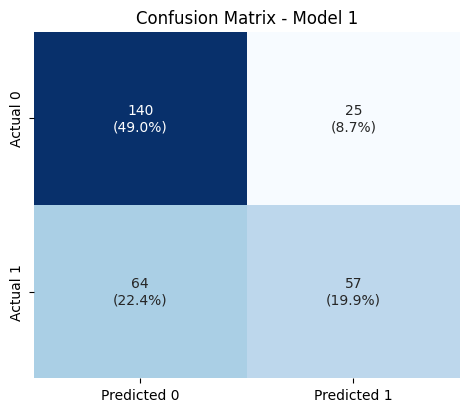

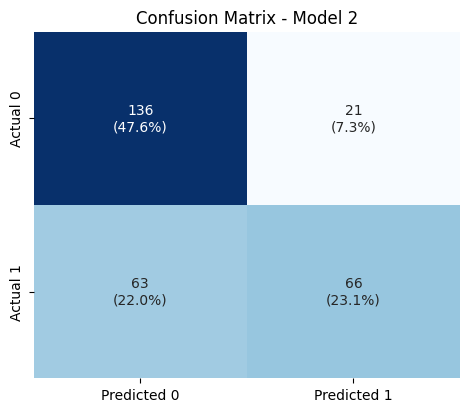

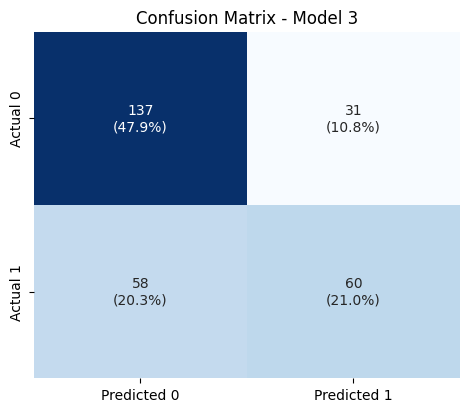

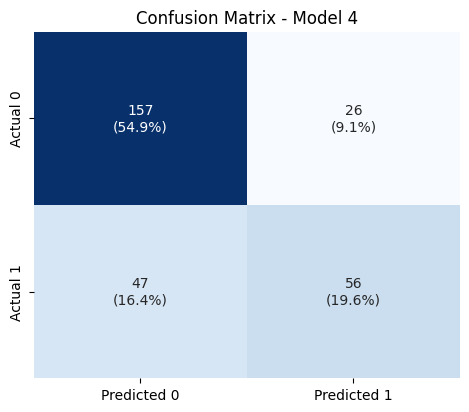

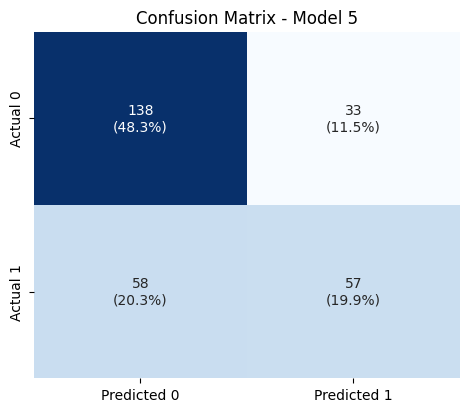

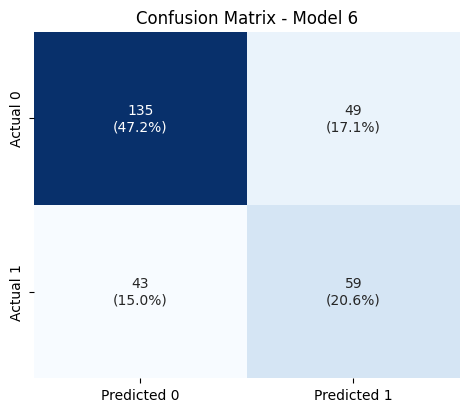

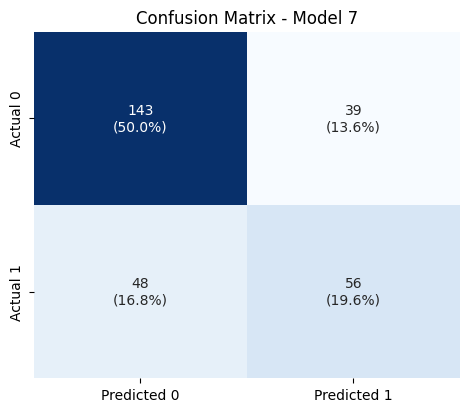

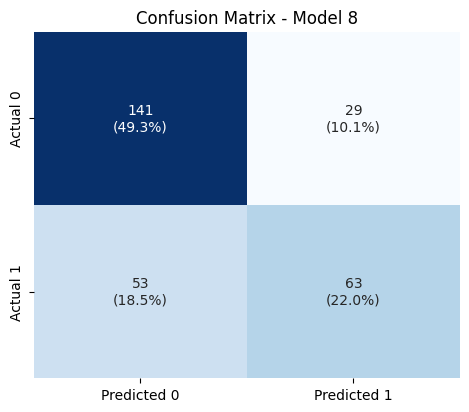

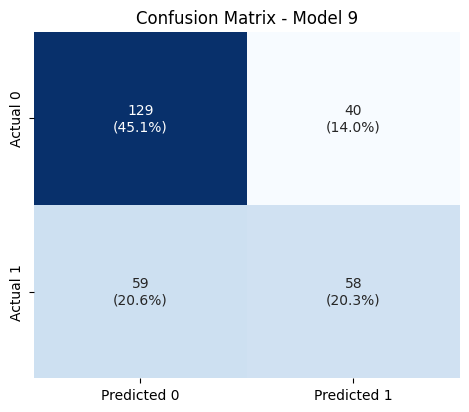

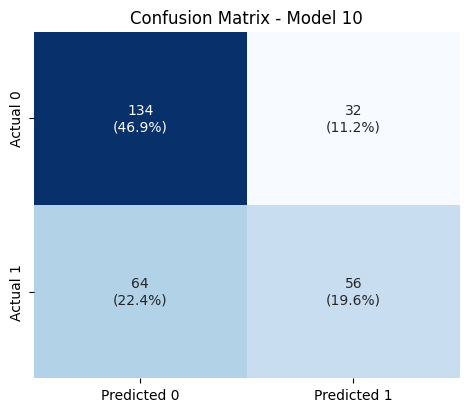

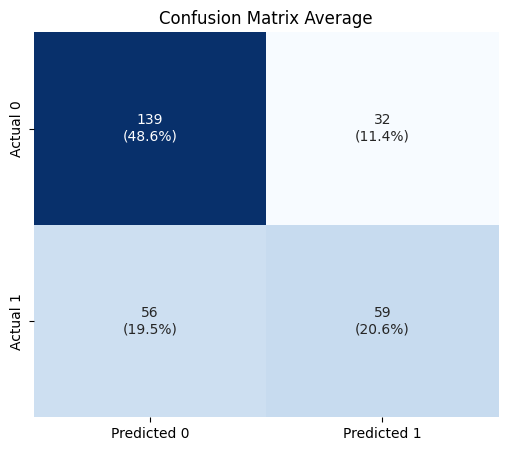

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix


num_0_target = 858
data_0 = df[df["TenYearCHD"] == 0]
data_1 = df[df["TenYearCHD"] == 1]

conf_matrices = []

for i in range(10):
    sampled_0 = resample(data_0, n_samples=num_0_target, replace=False, random_state=i)
    balanced_df = pd.concat([sampled_0, data_1], axis=0).sample(frac=1, random_state=i).reset_index(drop=True)
    
    X = balanced_df.drop(columns=["TenYearCHD"])
    y = balanced_df["TenYearCHD"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    
    total = cm.sum()
    cm_percent = (cm / total * 100).round(1)
    
    annot = np.empty_like(cm).astype(str)
    for r in range(cm.shape[0]):
        for c in range(cm.shape[1]):
            annot[r, c] = f"{cm[r, c]}\n({cm_percent[r, c]}%)"

    df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    
    plt.figure(figsize=(5.5, 4.5))
    sns.heatmap(df_cm, annot=annot, fmt="", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - Model {i+1}")
    plt.show()

conf_matrices = np.array(conf_matrices)
mean_cm = np.mean(conf_matrices, axis=0).round(2)
mean_total = mean_cm.sum()
mean_cm_percent = (mean_cm / mean_total * 100).round(1)

annot = np.empty_like(mean_cm).astype(str)
for r in range(mean_cm.shape[0]):
    for c in range(mean_cm.shape[1]):
        annot[r, c] = f"{int(round(mean_cm[r, c]))}\n({mean_cm_percent[r, c]}%)"

df_mean_cm = pd.DataFrame(mean_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

plt.figure(figsize=(6, 5))
sns.heatmap(df_mean_cm, annot=annot, fmt="", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Average")
plt.show()


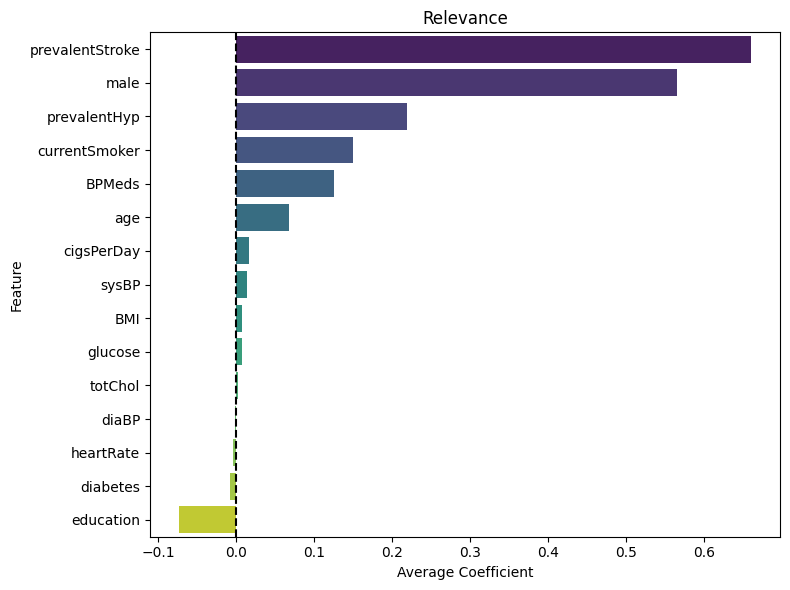

In [11]:
feature_names = X.columns
coef_matrix = []

for i in range(10):
    sampled_0 = resample(data_0, n_samples=num_0_target, replace=False, random_state=i)
    balanced_df = pd.concat([sampled_0, data_1], axis=0).sample(frac=1, random_state=i).reset_index(drop=True)
    
    X = balanced_df.drop(columns=["TenYearCHD"])
    y = balanced_df["TenYearCHD"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    
    coef_matrix.append(model.coef_[0])

coef_matrix = np.array(coef_matrix)
avg_coefs = np.mean(coef_matrix, axis=0)

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Average Coefficient": avg_coefs
}).sort_values(by="Average Coefficient", ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df, x="Average Coefficient", y="Feature", palette="viridis")
plt.axvline(0, color="black", linestyle="--")
plt.title("Relevance")
plt.tight_layout()
plt.show()
